In [1]:
import os
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tbparser.summary_reader import SummaryReader
from utils import get_params, get_values, get_step_values

In [2]:
experiment_dir = r"/home/christian/results/adv-research/ml-1m/vae--2023-10-10_09-03-48"

In [3]:
sr = SummaryReader(experiment_dir)
tb_data = sr.load_scalar_data()

In [4]:
tb_data

{'train/atk_loss': {"0/atk/{'adv_groups[0].grad_scaling'=0}/run/best_model_utility": [ScalarItem(step=0, wall_time=1696922570.1483114, value=0.577127993106842),
   ScalarItem(step=1, wall_time=1696922579.1465375, value=0.5071885585784912),
   ScalarItem(step=2, wall_time=1696922587.279951, value=0.49030324816703796),
   ScalarItem(step=3, wall_time=1696922596.1485412, value=0.4835647940635681),
   ScalarItem(step=4, wall_time=1696922604.956626, value=0.4776060879230499),
   ScalarItem(step=5, wall_time=1696922613.9201422, value=0.4749230444431305),
   ScalarItem(step=6, wall_time=1696922622.9033883, value=0.47543036937713623),
   ScalarItem(step=7, wall_time=1696922631.3376727, value=0.47597917914390564),
   ScalarItem(step=8, wall_time=1696922639.7023888, value=0.469485878944397),
   ScalarItem(step=9, wall_time=1696922648.3570063, value=0.47263747453689575),
   ScalarItem(step=10, wall_time=1696922656.8965607, value=0.47319644689559937),
   ScalarItem(step=11, wall_time=1696922665.37

In [5]:
tags = list(tb_data.keys())
tags

['train/atk_loss',
 'train/atk_loss/gender',
 'train/atk_eval/gender_bacc',
 'val/atk_loss',
 'val/atk_loss/gender',
 'val/atk_eval/gender_bacc',
 'test/atk_loss',
 'test/atk_loss/gender',
 'test/atk_eval/gender_bacc',
 'train/batch_loss',
 'train/batch_loss/nll',
 'train/batch_loss/KL',
 'train/batch_adv_loss',
 'train/batch_adv_loss/gender',
 'train/loss',
 'train/loss/nll',
 'train/loss/KL',
 'train/adv_loss',
 'train/adv_loss/gender',
 'val/loss',
 'val/loss/nll',
 'val/loss/KL',
 'val/adv_loss',
 'val/adv_loss/gender',
 'val/metrics/ndcg/10',
 'val/metrics/ndcg/20',
 'val/metrics/ndcg/50',
 'val/metrics/recall/10',
 'val/metrics/recall/20',
 'val/metrics/recall/50',
 'val/metrics/coverage/10',
 'val/metrics/coverage/20',
 'val/metrics/coverage/50',
 'val/adv_scores/gender_bacc']

In [6]:
def get_runs(tb_data, tag):
    return list(tb_data[tag].keys())
def get_run_param_map(tb_data, tag):
    return {run: get_params(run) for run in get_runs(tb_data, tag)}

In [26]:
def get_value(tb_data, tag, run_name, step):
        values = [entry.value for entry in tb_data[tag][run_name]]
        if step == "max":
            return max(values)
        elif step == "min":
            return min(values)
        else:
            return values[step]

def get_results(tb_data, tag, x_key, y_key, filter_run_name=None):
    tag_runs_params = get_run_param_map(tb_data, tag)
    tag_runs_params = {k: v for k, v in tag_runs_params.items() if filter_run_name is None or filter_run_name in k}
    x_data = np.array([run_param[x_key] for _, run_param in tag_runs_params.items()])
    
    y_data = np.array([get_value(tb_data, tag, run_name, y_key) for run_name, _ in tag_runs_params.items()])

    sorted_indices = np.argsort(x_data)
    return x_data[sorted_indices], y_data[sorted_indices]
    
def plot_results(x_data, y_data, x_label="", y_label=""):
    fig, ax = plt.subplots(figsize=(7,5))
    ax.plot(x_data, y_data, marker="o")
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    fig.show()
    
def get_and_plot_results(tb_data, tag, x_key, y_key, filter_run_name=None):
    x_data, y_data = get_results(tb_data, tag, x_key, y_key, filter_run_name)
    plot_results(x_data, y_data, x_key, tag)

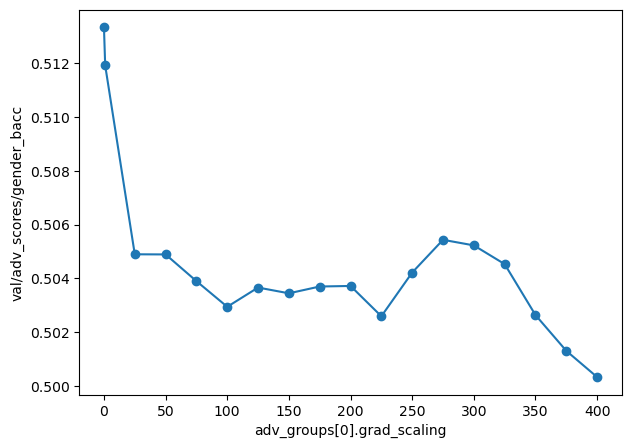

In [28]:
get_and_plot_results(tb_data, 
                     tag="val/adv_scores/gender_bacc", 
                     x_key="adv_groups[0].grad_scaling", y_key="max", 
                     filter_run_name=None)

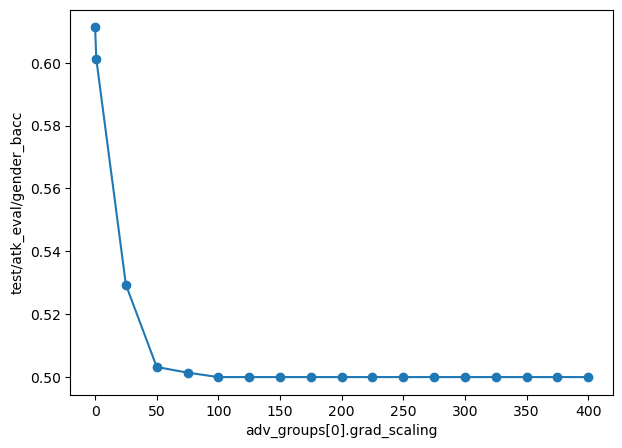

In [27]:
get_and_plot_results(tb_data, 
                     tag="test/atk_eval/gender_bacc", 
                     x_key="adv_groups[0].grad_scaling", y_key="max", 
                     filter_run_name="best_model_utility")